In [2]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

import seaborn as sns
sns.set(font_scale=1.8)
sns.set_style("whitegrid", {'axes.edgecolor': '.3', 'grid.color': '.4', 'grid.linestyle': '--'})

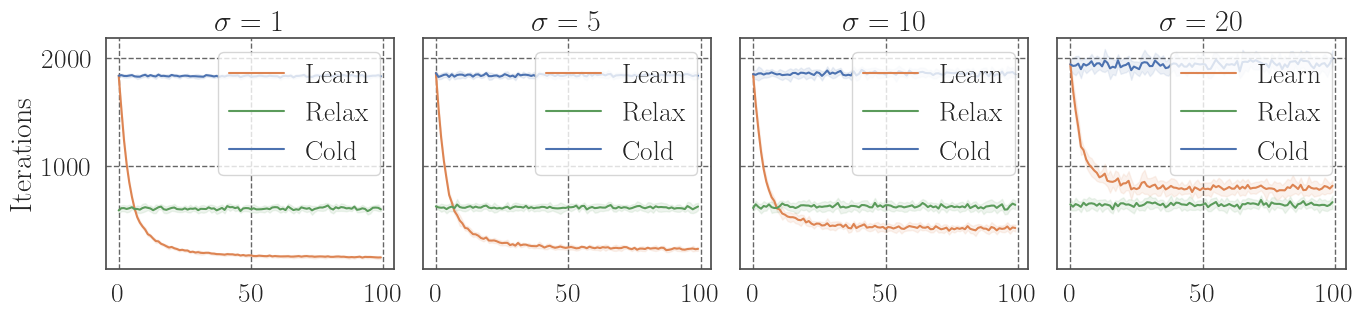

In [4]:
setting = 'n128'
df = pd.read_pickle(f'result/{setting}.pkl')
df = df[df['beta']==50] # if other multiple beta values are stored

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 3))

# get the unique pairs of alpha and beta
unique_pairs = df[['alpha', 'beta']].drop_duplicates() 

# iterate over the unique alpha and beta pairs, and create a subplot for each pair
for i, pair in enumerate(sorted(unique_pairs.values, key=lambda x: x[1])):
    alpha, beta = pair
    #ax = axes[i // 4, i % 4] # if beta takes multiple values
    ax = axes[i % 4]
    
    # select the subset of the data for this alpha and beta pair
    subset = df[(df['alpha'] == alpha) & (df['beta'] == beta)]
    
    # calculate the mean and standard deviation over the trials
    mean_itr_p = subset.groupby('t')['itr_p'].mean().reset_index()
    mean_itr_q = subset.groupby('t')['itr_q'].mean().reset_index()
    mean_itr_c = subset.groupby('t')['itr_c'].mean().reset_index()
    std_itr_p = subset.groupby('t')['itr_p'].std().reset_index()
    std_itr_q = subset.groupby('t')['itr_q'].std().reset_index()
    std_itr_c = subset.groupby('t')['itr_c'].std().reset_index()
    
    # define the colors
    itr_p_color = '#DD8452'
    itr_q_color = '#5B9B5B'
    itr_c_color = '#4C72B0'
    
    # plot with error bands
    sns.lineplot(data=mean_itr_p, x='t', y='itr_p', ax=ax, label=r'\rm Learn', err_style='band', err_kws={'alpha': 0.2}, color=itr_p_color)
    ax.fill_between(mean_itr_p['t'], mean_itr_p['itr_p'] - std_itr_p['itr_p'], mean_itr_p['itr_p'] + std_itr_p['itr_p'], alpha=0.1, color=itr_p_color)
    
    sns.lineplot(data=mean_itr_q, x='t', y='itr_q', ax=ax, label=r'\rm Relax', err_style='band', err_kws={'alpha': 0.2}, color=itr_q_color)
    ax.fill_between(mean_itr_q['t'], mean_itr_q['itr_q'] - std_itr_q['itr_q'], mean_itr_q['itr_q'] + std_itr_q['itr_q'], alpha=0.1, color=itr_q_color)
    
    sns.lineplot(data=mean_itr_c, x='t', y='itr_c', ax=ax, label=r'\rm Cold', err_style='band', err_kws={'alpha': 0.2}, color=itr_c_color)
    ax.fill_between(mean_itr_c['t'], mean_itr_c['itr_c'] - std_itr_c['itr_c'], mean_itr_c['itr_c'] + std_itr_c['itr_c'], alpha=0.1, color=itr_c_color)
    
    # set the title and axis labels
    ax.set_title(rf'$\sigma = {alpha}$') 
    ax.set_xlabel('' if i//4 == 0 else r'$t$')
    ax.set_ylabel(r'\rm Iterations')
    
    # set the legend, 'upper right'
    ax.legend(loc='upper right')

    # set the y-tick frequency
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1000))

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=.1, hspace=.32)

# show or save the plot
plt.show()
#plt.savefig(f'figure/{setting}.pdf', bbox_inches='tight')
